<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [24]:
# ANSWER
# Price. We want to predict the price
Y = house['price']

In [3]:
X = house['sq__ft']

#### 2.2 List all possible variables which might be Predictor variable.

In [6]:
# ANSWER
print(house.drop('price', axis=1).columns)

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'latitude', 'longitude'],
      dtype='object')


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<AxesSubplot:>

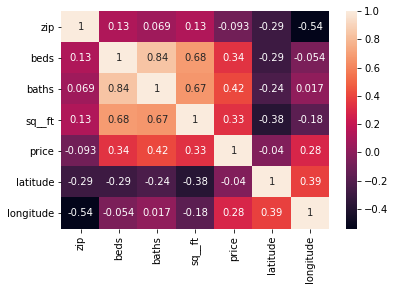

In [11]:
# ANSWER
sns.heatmap(house.corr(),annot=True)

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [13]:
# ANSWER
house['y_hat'] = house['price'].mean()
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,234144.263959
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,234144.263959
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,234144.263959
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,234144.263959


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [16]:
# ANSWER
residuals = abs(house['price'] - house['y_hat']).mean()
residuals

103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [17]:
# ANSWER
Y = house['price']
X = house['sq__ft']

In [24]:
x_bar = X.mean()
y_bar = Y.mean()

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [25]:
# ANSWER
def beta_1(x,y):
    x_bar = X.mean()
    y_bar = Y.mean()
    
    return np.sum((y - y_bar) * (x - x_bar)) / np.sum(np.square(x - x_bar))

beta_1 = beta_1(X,Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [28]:
# ANSWER
def beta_0(beta1, x_bar, y_bar):
    return y_bar - beta1 * x_bar

beta_0 = beta_0(beta_1, x_bar, y_bar)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [31]:
# ANSWER
def y_hat(beta_0, beta_1, x):
    return beta_0 + beta_1 * x 

y_hat = y_hat(beta_0, beta_1, X)
y_hat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [32]:
# ANSWER
residuals = abs(house['price'] - house['y_hat']).mean()
residuals

103452.16956891441

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [47]:
# ANSWER
def total_ss(y, y_bar):
    return np.sum(np.square(y - y_bar))

def residual_ss(y, y_hat):
    return np.sum(np.square(y - y_hat))
    
def r_square(total_ss, total_res):
    return 1 - (total_res / total_ss)

In [48]:
ss_tot = total_ss(Y, y_bar)
ss_res = residual_ss(Y, y_hat)
r_square = r_square(ss_tot, ss_res)

print(f"R square: {r_square} - total sum of squares: {ss_tot} - residual sum of squares: {ss_res}")

R square: 0.11148717682951459 - total sum of squares: 18838783738865.37 - residual sum of squares: 16738500924917.504


##### 2.7.F [BONUS] Draw Plot of Predicted Line

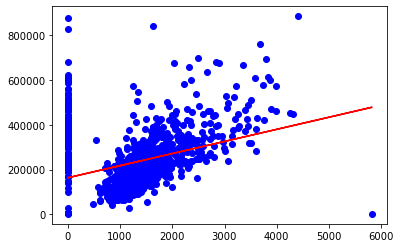

In [53]:
# ANSWER
plt.scatter(X, Y, color='b')
plt.plot(X, y_hat, color='r')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [ ]:
# ANSWER


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



